Necessary Imports:

*   pandas for data manipulation.
*   matplotlib for creating graphs.





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Data Uploading Function:

1.   Reads JSON file.
2.   Converts time data to datetime format
3.   Converts milliseconds to minutes



In [ ]:
def load_data(file_path):
    df = pd.read_json(file_path)
    df['endTime'] = pd.to_datetime(df['endTime'])
    df['date'] = df['endTime'].dt.date
    df['minutes_played'] = df['msPlayed'] / (1000 * 60)
    return df

Graphics Creation Function:

1.   Uses Seaborn style
2.   Creates 10x6 graph
3.   Calculate total daily listening time
4.   Draws line graph



In [ ]:
def plot_daily_listening(df):
    plt.style.use('seaborn-v0_8')
    plt.figure(figsize=(10, 6))
    daily_listening = df.groupby('date')['minutes_played'].sum()
    daily_listening.plot(kind='line')
    plt.title('Daily Listening Time')
    plt.xlabel('Date')
    plt.ylabel('Minutes')
    plt.tight_layout()
    plt.show()

Main Function and Operation:

1.   Includes error handling
2.   Calls main() function directly when script is run



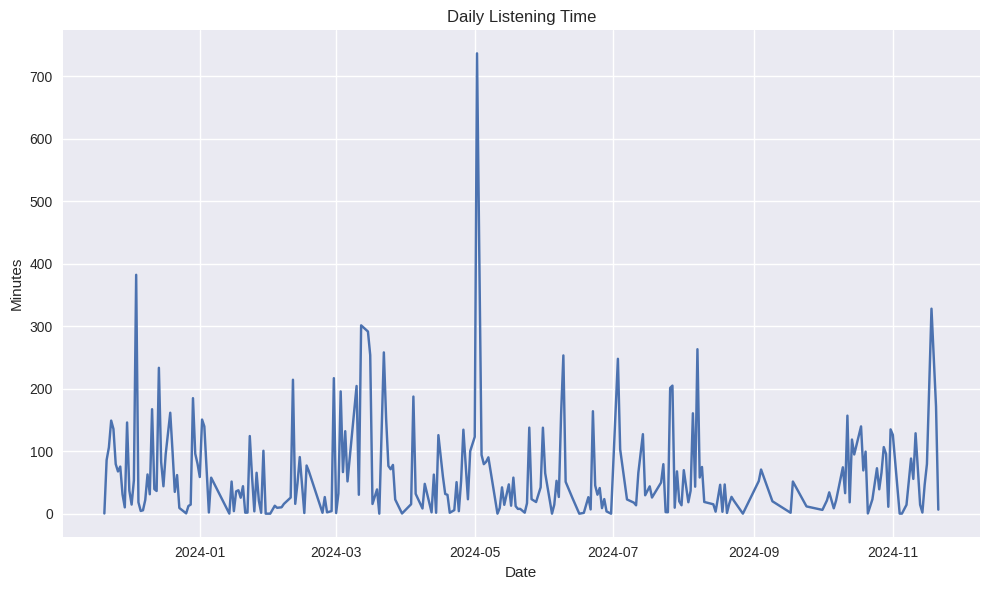

In [ ]:
def main():
    try:
        df = load_data("StreamingHistory_music_0.json")
        plot_daily_listening(df)
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()